# DATA UNDERSTANDING

In [2]:
# Importing Necessary liabries
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')


### Loading the data from the Zipfile

In [3]:

zip_file_path = "archive.zip"  
df = pd.read_csv(zip_file_path, compression='zip', encoding='utf-8')

df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
df.shape

(3333, 21)

In [6]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Removing whitespaces in the column name and replacing with '_'

In [7]:
df.columns = df.columns.str.replace(' ', '_')

Removing unnecessary columns drom our data frame

In [8]:
if 'state' in df.columns:
    df = df.drop('state', axis=1)
else:
    print("The 'state' column does not exist in the DataFrame.")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   phone_number            3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

This a view of all categorical data columns in our dataset

In [10]:

object_columns = df.select_dtypes(include=['object', 'bool'])
print(object_columns)


     phone_number international_plan voice_mail_plan  churn
0        382-4657                 no             yes  False
1        371-7191                 no             yes  False
2        358-1921                 no              no  False
3        375-9999                yes              no  False
4        330-6626                yes              no  False
...           ...                ...             ...    ...
3328     414-4276                 no             yes  False
3329     370-3271                 no              no  False
3330     328-8230                 no              no  False
3331     364-6381                yes              no  False
3332     400-4344                 no             yes  False

[3333 rows x 4 columns]


In [11]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check and process 'phone_number' column
if 'phone_number' in df.columns:
    # Convert to string, remove dashes, and convert back to integer
    df['phone_number'] = df['phone_number'].astype(str).str.replace('-', '').astype(int)
    print("Processed 'phone_number' column.")
else:
    print("The 'phone_number' column does not exist.")


Processed 'phone_number' column.


Converting the string phone number to an integer

In [12]:
df['phone_number'] = df['phone_number'].astype(str).str.replace('-', '').astype(int)



In [13]:
#Confirming that the phone number has converted to an integer
df.phone_number

0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone_number, Length: 3333, dtype: int32

In [14]:
##Checking the information or statistics of the continous data in our data frame
df.describe()

,account_length,area_code,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,2.746626e+05,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,4.229964e+06,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
df.columns

Index(['account_length', 'area_code', 'phone_number', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [16]:
df.shape

(3333, 20)

# DATA CLEANING

### looking into the dataframe to find mising values in the dataframe

In [17]:
Missing_values = df.isnull().sum()
Missing_values

account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

There are no missing values in the data frame .

### Checking for duplicates

In [18]:
Num_duplicates  = df.duplicated().sum()
Num_duplicates

0

## Checking for ouliers in the data

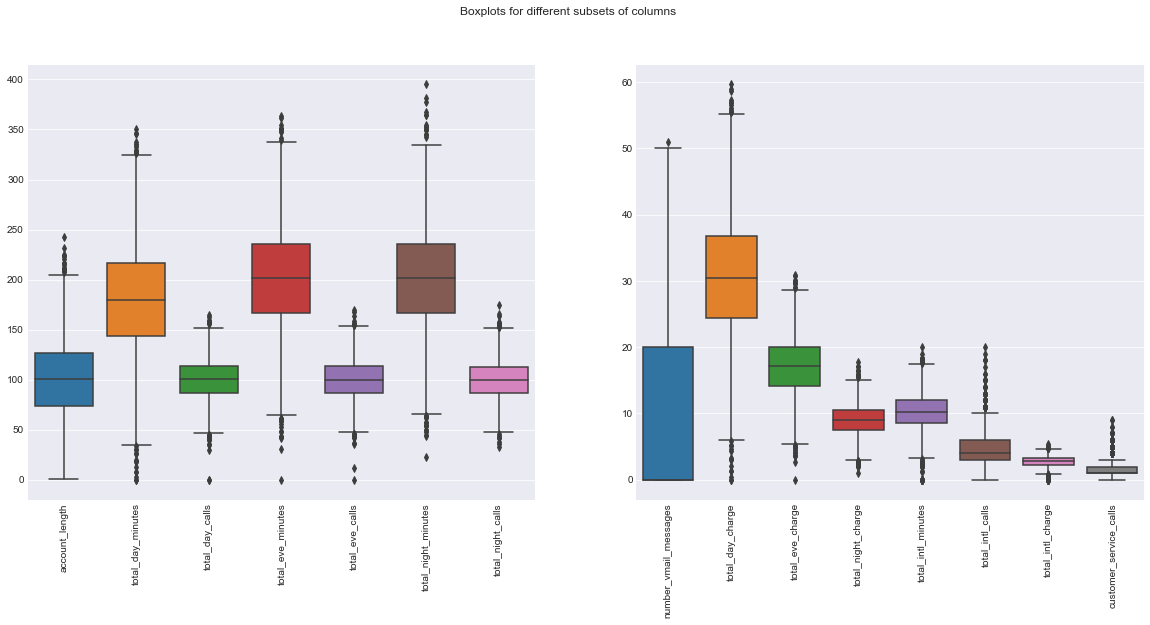

In [19]:
#Checking for outliers in the data
# List of columns for the first boxplot
cols1 = ['account_length','total_day_minutes','total_day_calls',
                'total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls']

# List of columns for the second boxplot
cols2 = ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_minutes'
         , 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a boxplot for the first subset of columns in the first column
sns.boxplot(data=df[cols1], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Create a boxplot for the second subset of columns in the second column
sns.boxplot(data=df[cols2], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

#setting the figure title
fig.suptitle('Boxplots for different subsets of columns')

# Show the plot
plt.show()

## Removing outliers

In [20]:
def remove_outlier(df, columns):
    for col in columns:
        if col in df.columns:  # Ensure the column exists in the DataFrame
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)  
            iqr = q3 - q1  
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Filter the DataFrame for values within the bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [21]:
columns_to_remove_outliers = [
    'account_length',
    'total_day_minutes',
    'total_day_calls',
    'total_eve_minutes',
    'total_eve_calls',
    'total_night_minutes',
    'total_night_calls',
    'number_vmail_messages',
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge',
    'total_intl_minutes',
    'total_intl_calls',
    'total_intl_charge',
    'customer_service_calls'
]

df= remove_outlier(df, columns_to_remove_outliers)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2797 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          2797 non-null   int64  
 1   area_code               2797 non-null   int64  
 2   phone_number            2797 non-null   int32  
 3   international_plan      2797 non-null   object 
 4   voice_mail_plan         2797 non-null   object 
 5   number_vmail_messages   2797 non-null   int64  
 6   total_day_minutes       2797 non-null   float64
 7   total_day_calls         2797 non-null   int64  
 8   total_day_charge        2797 non-null   float64
 9   total_eve_minutes       2797 non-null   float64
 10  total_eve_calls         2797 non-null   int64  
 11  total_eve_charge        2797 non-null   float64
 12  total_night_minutes     2797 non-null   float64
 13  total_night_calls       2797 non-null   int64  
 14  total_night_charge      2797 non-null   

In [23]:
df.account_length.value_counts()

87     37
105    37
93     35
90     35
107    34
       ..
26      1
204     1
202     1
200     1
4       1
Name: account_length, Length: 198, dtype: int64

In [24]:
df.area_code.unique()



array([415, 510, 408], dtype=int64)

In [25]:
df.area_code.value_counts()

415    1376
510     713
408     708
Name: area_code, dtype: int64

In [26]:
df.phone_number

0       3824657
1       3717191
2       3581921
4       3306626
5       3918027
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone_number, Length: 2797, dtype: int32

In [27]:
df.phone_number.unique

<bound method Series.unique of 0       3824657
1       3717191
2       3581921
4       3306626
5       3918027
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone_number, Length: 2797, dtype: int32>

In [28]:
## making phone_number column to be the index column given its the unique identifier
df.set_index('phone_number',inplace = True)

In [29]:
# Counting the occurrences of responses in this column
counts1 = df['voice_mail_plan'].value_counts()
counts1

no     2020
yes     777
Name: voice_mail_plan, dtype: int64

In [30]:
df.number_vmail_messages.value_counts()

0     2020
29      49
31      48
28      41
30      41
26      37
24      36
27      35
33      35
32      35
25      34
23      28
36      28
35      27
39      27
37      26
22      25
34      23
38      22
21      19
19      17
20      17
40      14
42      12
16      12
17      11
41      11
43       8
15       8
44       7
18       7
14       6
12       6
45       5
13       4
48       2
46       2
47       2
50       2
9        2
11       2
10       1
8        1
4        1
49       1
Name: number_vmail_messages, dtype: int64

In [31]:
df. total_day_minutes.value_counts()

159.5    8
175.4    7
154.0    7
174.5    7
155.2    6
        ..
155.1    1
85.7     1
115.8    1
244.6    1
40.4     1
Name: total_day_minutes, Length: 1517, dtype: int64

In [32]:
df. customer_service_calls.value_counts()

1    1062
2     702
0     637
3     396
Name: customer_service_calls, dtype: int64

In [33]:
df.churn.value_counts()

False    2493
True      304
Name: churn, dtype: int64

# Data Exploration 

## 1.Univariate Analysis

Univariate analysis is a type of data analysis that focuses on understanding and summarizing a single variable. The term "univariate" means "one variable," and this form of analysis is the simplest type of statistical analysis. It aims to describe the basic characteristics of the variable, such as its distribution, central tendency, spread, and potential outliers.

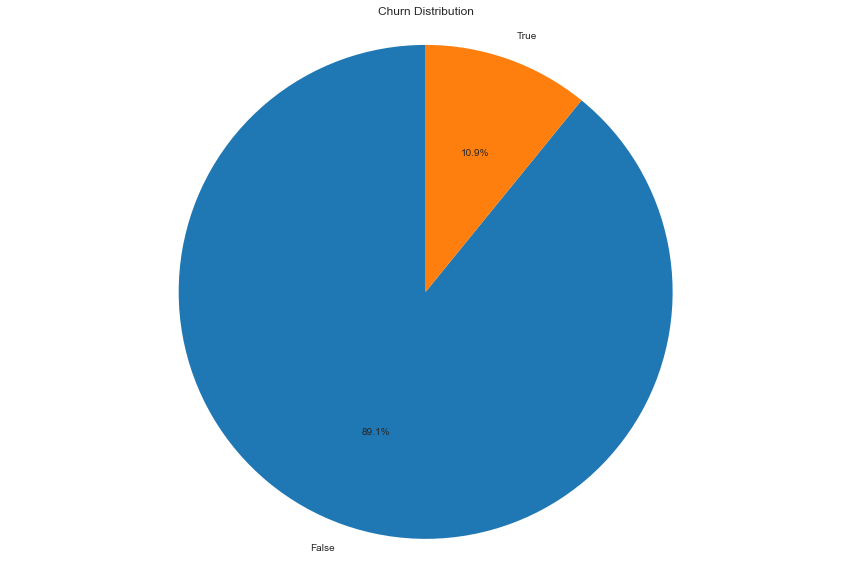

In [34]:
# representing the same using a Pie Chart to visualize the percentages
churn_counts = df['churn'].value_counts()

# Create a new figure with a larger size
plt.figure(figsize=(15, 10))

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Out of the 3,333 customers in the dataset, 483 have ended their contracts with the telecom company, accounting for 14.5% of the total customer base.

The distribution of these binary classes reveals a data imbalance. Addressing this imbalance is crucial before proceeding with modeling, as it could lead to biased predictions and reduce the model's accuracy in identifying churned customers.

## 2. Bivariate Analysis

Bivariate analysis examines the relationship between two variables to uncover patterns, correlations, or dependencies. It helps provide insights into how one variable influences or relates to another, which is essential for understanding complex datasets and making informed decisions. 

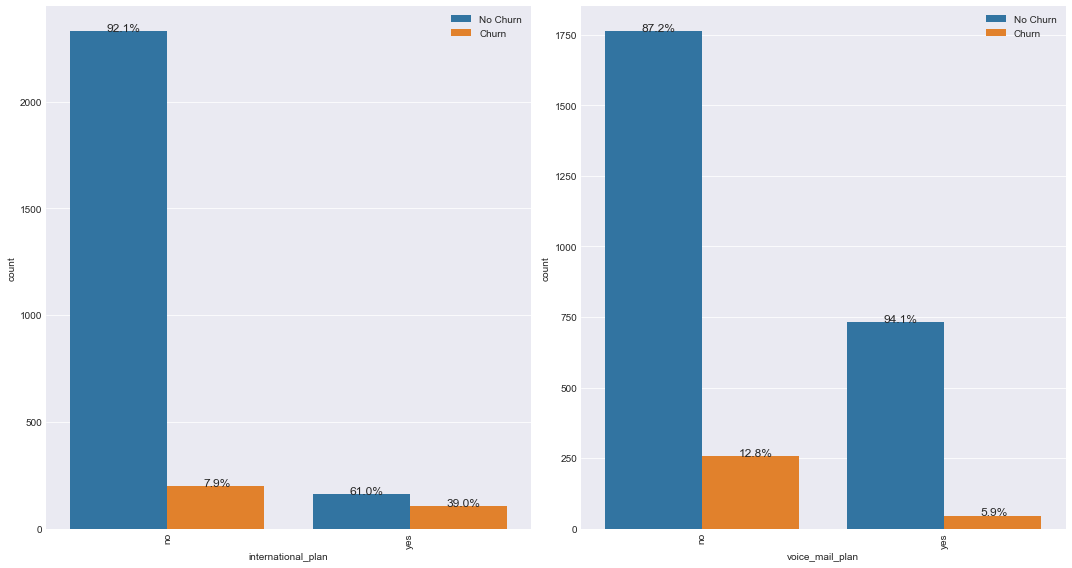

In [35]:
categoric_cols = ['international_plan','voice_mail_plan']

fig, axes = plt.subplots(nrows=1, ncols=len(categoric_cols), figsize=(15, 8))

for i, col in enumerate(categoric_cols):
    ax = sns.countplot(x=col, hue="churn", data=df, order=df[col].value_counts().iloc[0:15].index, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, ['No Churn', 'Churn'], loc="upper right")
    
    # Calculate the total number of observations within each group
    totals = df.groupby(col)["churn"].count().values
    
    # Iterate over the rectangles in the plot
    for j, p in enumerate(ax.patches):
        # Calculate the percentage of observations in each group
        percentage = '{:.1f}%'.format(100 * p.get_height()/totals[j % 2])
        # Add text annotations with the calculated percentages
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

For the international plan, a significantly higher percentage of customers who subscribed to the plan churned (39.3%) compared to those who did not subscribe (7.9%). This indicates a potential association between subscribing to the international plan and an increased likelihood of churning.

In contrast, for the voice mail plan, a smaller proportion of customers who subscribed to the plan churned (6.0%) compared to those without the subscription (12.8%). This suggests that having a voice mail plan may be linked to a reduced likelihood of churning.

We now visualize the correlations between Total minutes and customer churning. Here, we are trying to understand how each feature might be contributing to customer churning. We use single plots for .

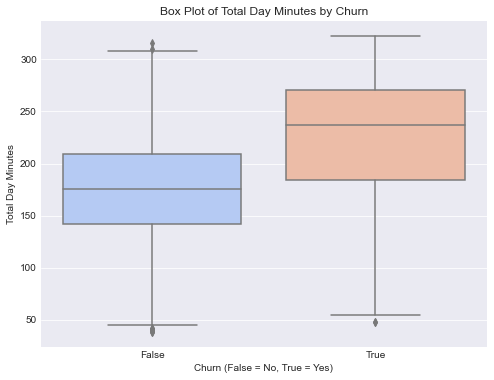

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='churn', y='total_day_minutes', palette='coolwarm')

plt.title('Box Plot of Total Day Minutes by Churn')
plt.xlabel('Churn (False = No, True = Yes)')
plt.ylabel('Total Day Minutes')
plt.show()



The plot above is a Box Plot illustrating the distribution of Total Day Minutes for customers who have churned (churn=True) versus those who have not (churn=False). Here's a detailed breakdown:

X-Axis (churn):

Represents the two categories of customers:
False (did not churn).
True (churned).
Y-Axis (Total Day Minutes):

Shows the total_day_minutes for each customer.
Box Plot Components:

Box:
Represents the interquartile range (IQR), which includes the middle 50% of the data (from the 25th to 75th percentile).
Horizontal Line Inside the Box:
Indicates the median (50th percentile) of the data.
Whiskers:
Extend to show the range of data within 1.5 times the IQR from the quartiles.
Outliers:
Individual points outside the whiskers are potential outliers.
Color:

# 3.Multivariate Analysis

Multivariate Analysis explores relationships among three or more variables simultaneously, helping to uncover complex interactions and patterns that might not be evident in univariate or bivariate analyses. This approach is crucial for understanding how multiple features collectively influence the target variable.

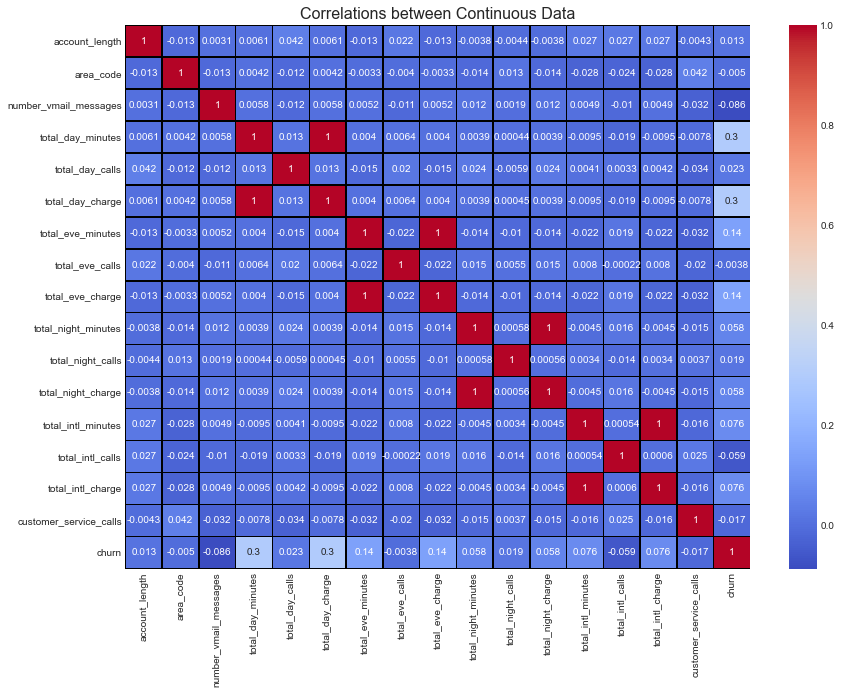

In [37]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlations between Continuous Data', fontsize=16)
plt.show()

# DATA PREPARATION FOR MODELING

Data preparation is a critical step in the machine learning workflow. Proper preparation ensures that the model receives clean, consistent, and meaningful data, leading to better performance and reliable predictions

Data Preparation for Modeling

1)Understand the Dataset
Examine data structure, missing values, and the target variable .

2)Clean the Data
Handle missing values: Fill or drop them.
Remove duplicates and irrelevant columns.
Detect and address outliers using statistical methods like IQR.

3)Feature Engineering
Select relevant features for modeling.
Transform categorical variables (e.g., one-hot or label encoding).
Scale/normalize numerical data for algorithms sensitive to scale.

4)Handle Imbalanced Classes
Use techniques like oversampling (e.g., SMOTE), undersampling, or class weights.

5)Split the Data
Create training and testing sets (e.g., 80-20 split) with stratified sampling for classification problems.

6)Final Check
Verify no data leakage (e.g., test data influencing training).
Ensure all transformations and encodings are complete.


#### We start from step 3 which is Transform categorical variables (e.g., one-hot or label encoding). Scale/normalize numerical data for algorithms sensitive to scale. since step 1 and 2 have been done in the data  understanding and cleaning


In [38]:
df['churn'] = df['churn'].astype(int)

#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area_code', 'international_plan', 'voice_mail_plan'])


In [39]:
# To confirm that the one hot encoding worked
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
phone_number,,,,,,,,,,,,,,,,,,,,,
3824657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,2.70,1,0,0,1,0,1,0,0,1
3717191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,0,0,1,0,1,0,0,1
3581921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,0,0,1,0,1,0,1,0
3306626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,0,0,1,0,0,1,1,0
3918027,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,1.70,0,0,0,0,1,0,1,1,0


#### We are now at step 4 where we balance the classes

In [40]:
# Separate features (X) and target (y)
X = df.drop('churn', axis=1)  # Drop target column from features
y = df['churn']  # Target variable

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())  # Check class distribution
print("After SMOTE:", y_resampled.value_counts())  # Check new distri

Before SMOTE: 0    2493
1     304
Name: churn, dtype: int64
After SMOTE: 1    2493
0    2493
Name: churn, dtype: int64


### We are now at step 5 where we Split the Data Create training and testing sets

In [54]:
# Assuming df is your DataFrame and 'churn' is the target variable
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
#Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 2237 samples
Test set size: 560 samples


### Standardize the data

Standardizing data is a critical preprocessing step in many machine learning workflows. It ensures that numerical features are on the same scale, making the models more effective and accurate.

In [56]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# MODEL CREATION

We develop and evaluate multiple models, followed by hyperparameter tuning to enhance their performance. Our goal is to identify the model and parameter configuration that delivers the best results.

The models we train and evaluate include:

1)Logistic Regression,

2)K-Nearest Neighbors (KNN),


## 1)Prediction using Logistic model

In [65]:
# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Show the logistic regression model
print("Trained Logistic Regression Model:")
print(logreg_model)



Trained Logistic Regression Model:
LogisticRegression(max_iter=1000, random_state=42)


In [67]:
# Now make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_report = classification_report(y_test, y_pred_logistic)
logistic_confusion = confusion_matrix(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\
", logistic_report)
print("Logistic Regression Confusion Matrix:\
", logistic_confusion)


Logistic Regression Accuracy: 0.8964285714285715
Logistic Regression Classification Report:               precision    recall  f1-score   support

           0       0.91      0.98      0.94       490
           1       0.69      0.31      0.43        70

    accuracy                           0.90       560
   macro avg       0.80      0.65      0.69       560
weighted avg       0.88      0.90      0.88       560

Logistic Regression Confusion Matrix: [[480  10]
 [ 48  22]]


conf_matrix = confusion_matrix(y_test, predLR)

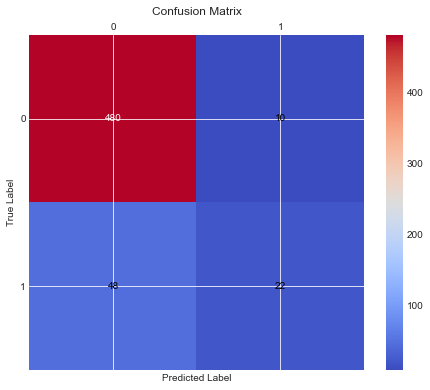

In [68]:
# Create the confusion matrix heatmap
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Confusion Matrix", pad=20)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Annotate the heatmap with the counts
for (i, j), val in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{val}', ha='center', va='center', color='white' if val > conf_matrix.max() / 2 else 'black')

# Display the plot
plt.show()

logistic Regression Model Performance
Accuracy: 0.896

Classification Report:

Class 0 (Negative Class): Precision: 0.91, Recall: 0.98, F1-Score: 0.94 (Support: 490)
Class 1 (Positive Class): Precision: 0.69, Recall: 0.31, F1-Score: 0.43 (Support: 70)
Overall Accuracy: 0.90
Macro Average: Precision: 0.80, Recall: 0.65, F1-Score: 0.69
Weighted Average: Precision: 0.88, Recall: 0.90, F1-Score: 0.88
Confusion Matrix:

True Negatives: 480, False Positives: 10
False Negatives: 48, True Positives: 22

## 2) Predict using K-Nearest Neighbors

In [69]:
# Initialize and train K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [72]:
# Predict using KNN
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)
knn_confusion = confusion_matrix(y_test, y_pred_knn)

print("\
K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:\
", knn_report)
print("K-Nearest Neighbors Confusion Matrix:\
", knn_confusion)

K-Nearest Neighbors Accuracy: 0.8910714285714286
K-Nearest Neighbors Classification Report:               precision    recall  f1-score   support

           0       0.90      0.99      0.94       490
           1       0.71      0.21      0.33        70

    accuracy                           0.89       560
   macro avg       0.81      0.60      0.64       560
weighted avg       0.88      0.89      0.86       560

K-Nearest Neighbors Confusion Matrix: [[484   6]
 [ 55  15]]


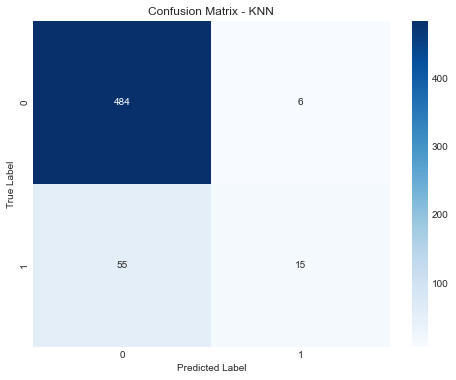

In [73]:
# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()